In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [4]:
# Define the URL
url = "https://hahana.soest.hawaii.edu/FTP/hot/water/ac2.sea"

# Send a GET request to the URL
response = requests.get(url)

In [5]:
response

<Response [200]>

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')

# Assuming the data is in a table, find the table element
table = soup.find('table')

In [7]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "data/ts1.csv"  # Update this with the actual path to your CSV file

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


      crn     date  stime  etime  itype  depth      chl    phaeo       l12  \
0       #   yymmdd   hhmm   hhmm             m    mg/m3    mg/m3   mg C/m3   
1       1   881031     -9     -9      0     24    0.129    0.077    12.210   
2       1   881031     -9     -9      0     42    0.192    0.051     2.470   
3       1   881031     -9     -9      0     68    0.285    0.303     2.580   
4       1   881031     -9     -9      0    114    0.326    0.044     0.720   
...   ...      ...    ...    ...    ...    ...      ...      ...       ...   
2585  339   220901    443   1948      2     75    0.180    0.227    -9.000   
2586  339   220901    443   1948      2    100    0.208    0.578    -9.000   
2587  339   220901    443   1948      2    125    0.130    0.418    -9.000   
2588  339   220901    443   1948      2    150    0.076    0.310    -9.000   
2589  339   220901    443   1948      2    175    0.038    0.128    -9.000   

           d12      bsal     pbact     hbact     sbact     ebac

In [8]:
import matplotlib.pyplot as plt
import arviz as az

# Assuming df is your DataFrame with 'chl' and 'data' columns

# Convert 'data' column to datetime format
df[' date'] = pd.to_datetime(df[' date'][1:], format=' %y%m%d')

# Clean and convert 'chl' column to numeric values
df[' chl'] = df[' chl'].apply(lambda x: pd.to_numeric(x.split(), errors='coerce').mean())

# Calculate the mean for each date
df_chl = df.groupby(' date', dropna=True)[' chl'].mean().reset_index()


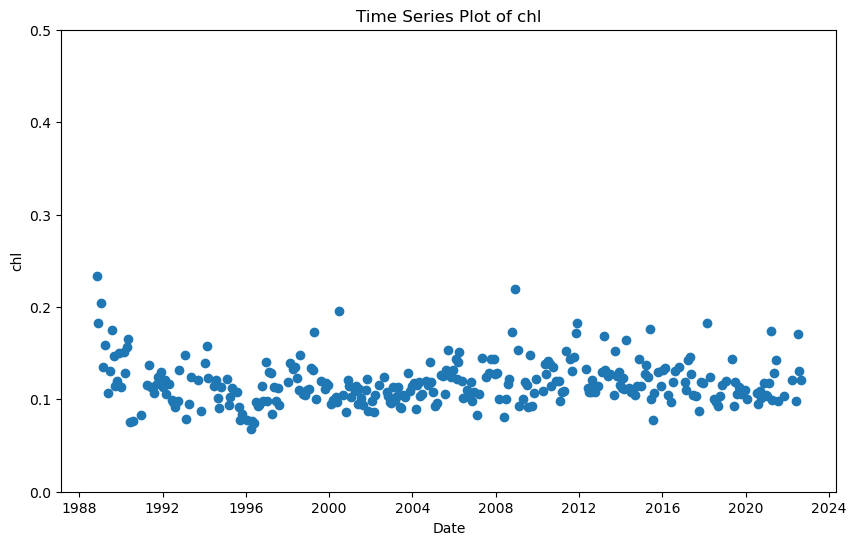

In [9]:
## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_chl[' date'], df_chl[' chl'], marker='o', linestyle='')
plt.title('Time Series Plot of chl')
plt.xlabel('Date')
plt.ylabel('chl')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

In [10]:
# Clean and convert 'chl' column to numeric values
df[' phaeo'] = df[' phaeo'].apply(lambda x: pd.to_numeric(x.split(), errors='coerce').mean())

# Calculate the mean for each date
df_phaeo = df.groupby(' date', dropna=True)[' phaeo'].mean().reset_index()


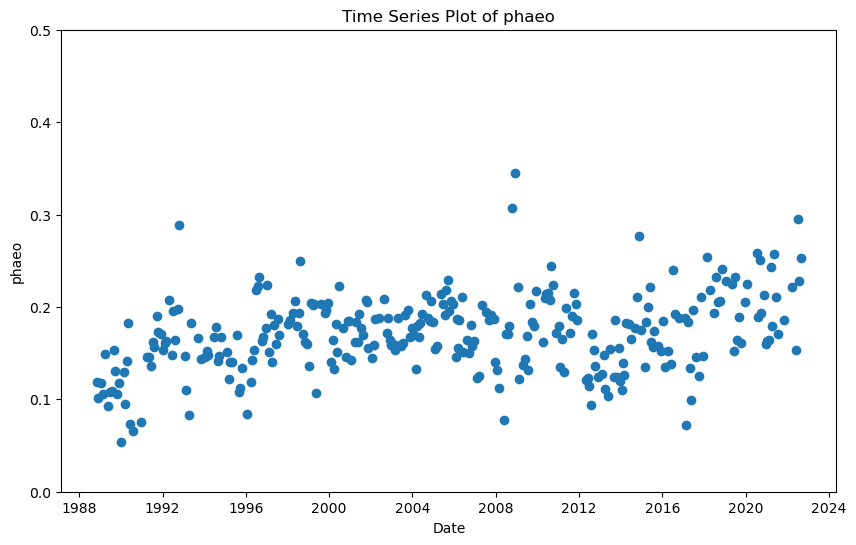

In [11]:
## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_phaeo[' date'], df_phaeo[' phaeo'], marker='o', linestyle='')
plt.title('Time Series Plot of phaeo')
plt.xlabel('Date')
plt.ylabel('phaeo')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

In [ ]:
!pip install neuralprophet

In [ ]:
# Create a NeuralProphet model with default parameters
from neuralprophet import NeuralProphet, set_log_level
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df_chl)

In [ ]:
import numpy as np

In [12]:
!pip install ./neural_prophet/.

Processing ./neural_prophet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached captum-0.6.0-py3-none-any.whl (1.3 MB)
  Using cached holidays-0.36-py3-none-any.whl (822 kB)
  Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
  Using cached plotly-5.18.0-py3-none-any.whl (15.6 MB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached torch-2.0.0-cp311-none-macosx_11_0_arm64.whl (55.8 MB)
  Using cached torchmetrics-0.11.4-py3-none-any.whl (519 kB)
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
ERROR: Package 'neuralprophet' requires a different Python: 3.11.4 not in '<3.11,>=3.8'


In [13]:
import sys
sys.version_info


sys.version_info(major=3, minor=11, micro=3, releaselevel='final', serial=0)

In [1]:
!source scope_venv/bin/activate

In [3]:
!python -V

Python 3.11.4
